# COMP 551 Mini Project 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import permutation
from IPython.core.debugger import set_trace  

# Set the seed for reproducibility (initializes the random number generator)
np.random.seed(500)

## Task 1: Acquire, preprocess, and analyze the data

Possible acronyms used for the datasets in this notebook
- Wisconsin Breast Cancer Dataset (WBC)
- Hepatitis Dataset (HP)





In [2]:
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
url2 = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"

data1 = pd.read_csv(url1, header=None)
data2 = pd.read_csv(url2, header=None)

print(data1.shape)
print(data2.shape)

(699, 11)
(155, 20)


#### 1.1 Data preprocessing

In [3]:
# Wisconsin Breast cancer dataset (WBC)
# Eliminate rows with missing values
df =data1[~data1.eq('?').any(1)]
# Add column names
df.columns = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli','Mitoses','Class']
# Move 'Class' to the first column
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
# Drop 'Sample_code_number'
df = df.drop(columns='Sample_code_number')

# Hepatitis Dataset (HP)
# Eliminate rows with missing values
df2 =data2[~data2.eq('?').any(1)]
# Add column names
df2.columns = ['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver_big','Liver_firm','Spleen_Palpable','Spiders','Ascites','Varices','Bilirubin','Alk_phosphate','Sgot','Albumin','Protime','Histology']

print(df.shape)
display(df.head())

print(df2.shape)
df2.head()


(683, 10)


,Class,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1


(80, 20)


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1


From the original class distributions

Wisconsin Brest Cancer Dataset : 
- Benign: 458 (65.5%)
- Malignant: 241 (34.5%)

Hapatitis Dataset : 
- DIE: 32 
- LIVE: 123

In [4]:
# WBC
# We deduce that 
# Class: (2 for benign, 4 for malignant)
print(df['Class'].value_counts())

# HP
# We deduce that 
# Class: (2 for LIVE, 1 for DIE)
print(df2['Class'].value_counts())

2    444
4    239
Name: Class, dtype: int64
2    67
1    13
Name: Class, dtype: int64


##### 1.1.1 Non normalized data 

For consistency and easier distance evaluation afterwards: 
> We will replace values in WBC dataset: 0 for benign, 1 for malignant

> We will replace values in HP dataset: 0 for live, 1 for die


In [5]:
# Replace categorical values with 0, 1
# WBC
df['Class'].replace({2:0, 4:1}, inplace=True)
# HP
l = list(range(3,14))
l.append(0)
l.append(19)
for i in l:
  df2.iloc[:,i].replace({2: 0}, inplace=True)

# Convert types to numeric
# WBC
df = df.apply(pd.to_numeric) 
# HP
df2 = df2.apply(pd.to_numeric)

display(df2.head())
# display(df.dtypes)
# display(df2.dtypes)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
5,0,34,1,2,0,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
10,0,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
11,0,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
12,0,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
13,0,30,1,2,0,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1


##### 1.1.2 Normalized data


In [6]:
# Normalize a copy of data for KNN
def normalize(x):
  normalized = (x-min(x))/(max(x)-min(x))
  return normalized

df_normalized = df.apply(normalize)
df2_normalized = df2.apply(normalize)

df2_normalized.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
5,0.0,0.269231,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.133333,0.271654,0.034483,0.655172,0.75,1.0
10,0.0,0.365385,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.222222,0.204724,0.039409,0.793103,0.85,1.0
11,0.0,0.230769,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.155556,0.129921,0.578818,0.551724,0.54,1.0
12,0.0,0.403846,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.133333,0.216535,0.113300,0.620690,0.52,1.0
13,0.0,0.192308,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.422222,0.122047,0.320197,0.965517,0.78,1.0


In [7]:
# Convert the categorical data to Categorical type

# Normalized
df_normalized['Class'] = df_normalized['Class'].astype("category")
df2_normalized['Class'] = df2_normalized['Class'].astype("category")
for i in l:
  df2_normalized.iloc[:,i] = df2_normalized.iloc[:,i].astype("category")

# Non Normalized 
df['Class'] = df['Class'].astype("category")
df2['Class'] = df2['Class'].astype("category")
for i in l:
  df2.iloc[:,i] = df2.iloc[:,i].astype("category")


df2_normalized.head()
df2_normalized.dtypes

Class              category
Age                 float64
Sex                 float64
Steroid            category
Antivirals         category
Fatigue            category
Malaise            category
Anorexia           category
Liver_big          category
Liver_firm         category
Spleen_Palpable    category
Spiders            category
Ascites            category
Varices            category
Bilirubin           float64
Alk_phosphate       float64
Sgot                float64
Albumin             float64
Protime             float64
Histology          category
dtype: object

#### 1.2 Statistical Analysis
 > Performed on non-normalized data

Check for positive/negative datapoint distribution

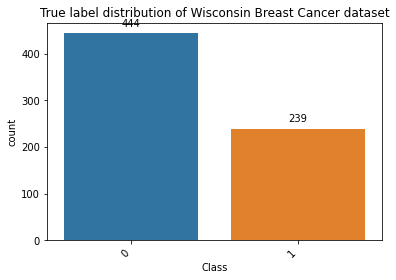

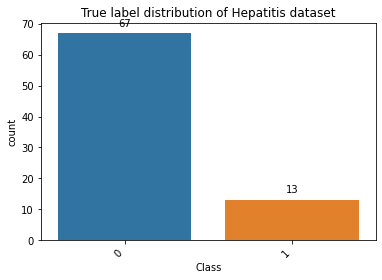

In [8]:
# Breast cancer dataset
ax = sns.countplot(x='Class', data=pd.DataFrame(df, columns=['Class']), order=[0, 1])
ax.set_title("True label distribution of Wisconsin Breast Cancer dataset")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

# Hepatitis Dataset
ax = sns.countplot(x='Class', data=pd.DataFrame(df2, columns=['Class']), order=[0, 1])
ax.set_title("True label distribution of Hepatitis dataset")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [9]:
# Check unique values in each column
def checkUnique(df):
  column_list = df.columns.values.tolist()
  for column_name in column_list:
    print(column_name, ":", df[column_name].unique())
  print("\n")
# checkUnique(df)
# checkUnique(df2)

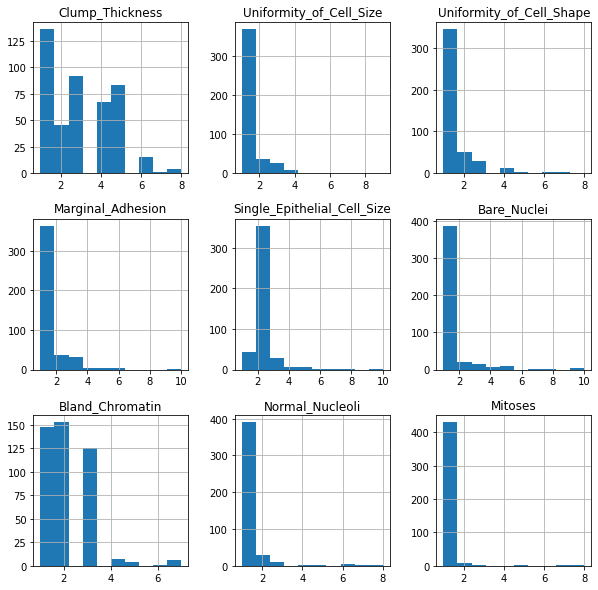

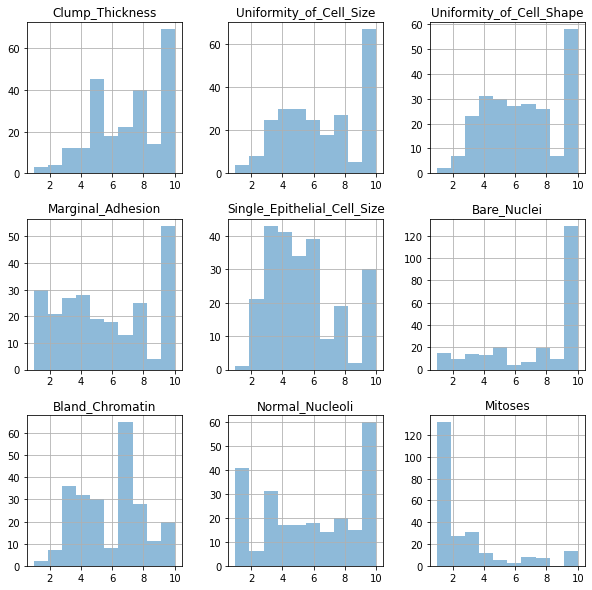

In [10]:
# For breast-cancer-wisconsin dataset
# We will denote: benign as negative, malignant as positive
df_neg = df.loc[df['Class'] == 0]
df_pos = df.loc[df['Class'] == 1]

hist_neg = df_neg.iloc[:,1:].hist(figsize = (10,10), bins=10,alpha= 1)
hist_pos = df_pos.iloc[:,1:].hist(figsize = (10,10), bins=10,alpha=0.5)

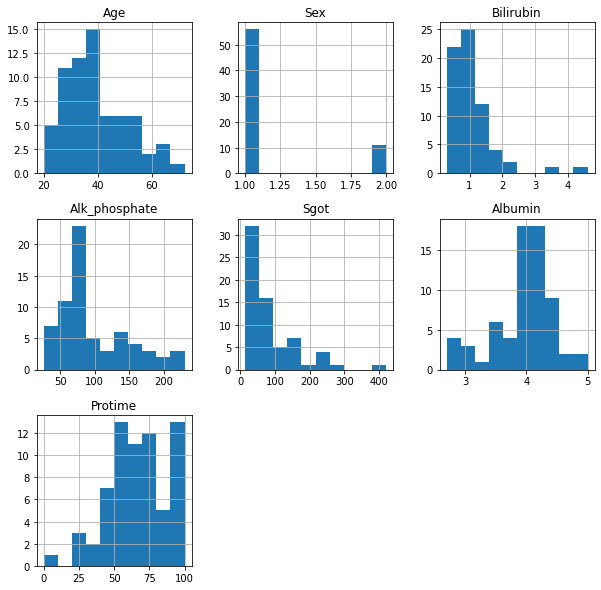

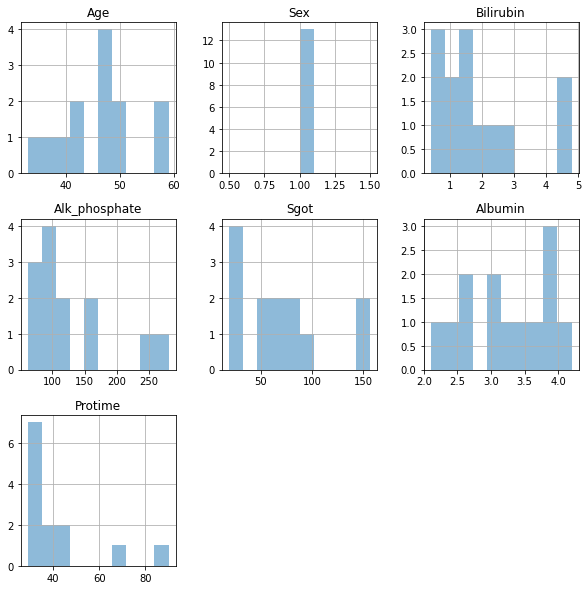

In [11]:
# For hepatitis dataset
# We will denote: LIVE as negative, DIE as positive
df2_neg = df2.loc[df2['Class'] == 0]
df2_pos = df2.loc[df2['Class'] == 1]

hist_neg = df2_neg.iloc[:,1:].hist(figsize = (10,10), bins=10,alpha= 1)
hist_pos = df2_pos.iloc[:,1:].hist(figsize = (10,10), bins=10,alpha=0.5)

In [12]:
# Find basic statistics
def calcStats(df_features):
  series_dict = {
    "Mean" : df_features.astype(float).mean(),
    "Median" : df_features.astype(float).median(),
    "Std" : df_features.astype(float).std(),
  }

  quantiles = df_features.astype(float).quantile([0.0,0.5,0.90,0.95])
  res = pd.concat(series_dict, axis=1)
  return res, quantiles

# Find basic statistics on breast-cancer-wisconsin dataset
display(calcStats(df.iloc[:,1:])[0], calcStats(df.iloc[:,1:])[1])
# Find basic statistics on hepatitis dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2_num = df2.select_dtypes(include=numerics)
display(calcStats(df2_num)[0], calcStats(df2_num)[1])


,Mean,Median,Std
Clump_Thickness,4.442167,4.0,2.820761
Uniformity_of_Cell_Size,3.150805,1.0,3.065145
Uniformity_of_Cell_Shape,3.215227,1.0,2.988581
Marginal_Adhesion,2.830161,1.0,2.864562
Single_Epithelial_Cell_Size,3.234261,2.0,2.223085
Bare_Nuclei,3.544656,1.0,3.643857
Bland_Chromatin,3.445095,3.0,2.449697
Normal_Nucleoli,2.869693,1.0,3.052666
Mitoses,1.603221,1.0,1.732674


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.50,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
0.90,9.8,9.0,8.0,8.0,6.0,10.0,7.0,9.0,3.0
0.95,10.0,10.0,10.0,10.0,8.0,10.0,8.0,10.0,5.0


,Mean,Median,Std
Age,40.66250,38.5,11.280030
Sex,1.13750,1.0,0.346547
Bilirubin,1.22125,1.0,0.875213
Alk_phosphate,102.91250,85.0,53.684779
Sgot,82.02500,56.5,71.599974
Albumin,3.84375,4.0,0.576292
Protime,62.51250,62.0,23.427774


,Age,Sex,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime
0.00,20.00,1.0,0.300,26.0,14.0,2.100,0.0
0.50,38.50,1.0,1.000,85.0,56.5,4.000,62.0
0.90,56.10,2.0,2.020,180.1,166.7,4.400,100.0
0.95,61.05,2.0,2.835,215.0,225.1,4.505,100.0


## Task 2: Implement the models





#### 2.1 KNN Model

In [13]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
from math import *
from decimal import Decimal
def my_p_root(value, root):
   my_root_value = 1 / float(root)
   return round (Decimal(value) ** Decimal(my_root_value), 3)
# hamming = lambda x1, x2: bin(x1 ^ x2).count('1')

# def cos_sim(a, b):
# 	"""Takes 2 vectors a, b and returns the cosine similarity according 
# 	to the definition of the dot product
# 	"""
# 	dot_product = np.dot(a, b)
# 	norm_a = np.linalg.norm(a)
# 	norm_b = np.linalg.norm(b)
# 	return dot_product / (norm_a * norm_b)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = len(np.unique(y))
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        # print(knns.shape, self.K)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))

        for i in range(num_test):
            d = distances[i]
            knns[i,:] = np.argsort(d)[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns


#### 2.2 Decision Tree Model

In [14]:
# Set the data structure to represent nodes
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [15]:
# greedy spliting a node
# the split is greedy because it looks one step ahead, this may not lead to the lowest overall cost
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value


In [16]:
# implement the 3 choices of cost functions
# computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [17]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass

In [18]:
def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self
def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

In [19]:
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

#### 2.3 Evaluation metrics

In [20]:
def evaluate_acc(yhat, y):
  acc = np.sum(y == yhat)/y.shape[0]
  return acc

In [21]:
def confusion_matrix(y, yh):
    n_classes = np.max(y) + 1
    c_matrix = np.zeros((n_classes, n_classes))
    for c1 in range(n_classes):
        for c2 in range(n_classes):
            #(y==c1)*(yh==c2) is 1 when both conditions are true or 0
            c_matrix[c1, c2] = np.sum((y==c1)*(yh==c2))
    return c_matrix

def recall(y, yh):
  cmat = confusion_matrix(y, yh)
  recall = cmat[0][0] / sum(cmat[:][0])
  return recall

## Task 3: Run experiments
> Using 8:1:1 train, validation, test split ratio

#### 3.1 Dataset Overview and Define key Functions

In [22]:
# Datasets overview 
# print the feature shape and classes of dataset
x, y = df_normalized.iloc[:,1:].to_numpy(), df_normalized["Class"]
(N,D), C = x.shape, len(np.unique(y))
print("----------WBC dataset-----------")
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

x, y = df2_normalized.iloc[:,1:].to_numpy(), df2_normalized["Class"]
(N,D), C = x.shape, len(np.unique(y))
print("\n","----------HP dataset-----------")
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

----------WBC dataset-----------
instances (N) 	 683 
 features (D) 	 9 
 classes (C) 	 2

 ----------HP dataset-----------
instances (N) 	 80 
 features (D) 	 19 
 classes (C) 	 2


In [23]:
# Function to split the dataset into train, validation and test
def splitSets(df):
  df_neg = df.loc[df['Class'] == 0]
  df_pos = df.loc[df['Class'] == 1]

  x_neg, y_neg = df_neg.iloc[:,1:].to_numpy(), df_neg['Class'].to_numpy()
  x_pos, y_pos = df_pos.iloc[:,1:].to_numpy(), df_pos['Class'].to_numpy()

  # Shuffle positive and neg indices of separately
  # Set the seed for reproducibility (initializes the random number generator)
  np.random.seed(500)
  indp = np.random.permutation(x_pos.shape[0]) 
  indn = np.random.permutation(x_neg.shape[0]) 

  # Index of cutoff points for 8:1:1 ratio
  cn = round(.8*len(df_neg))
  cp = round(.8*len(df_pos))

  cn2 = cn+round(.1*len(df_neg))
  cp2 = cp+round(.1*len(df_pos))

  # Split the dataset into train, validation and test
  x_train = np.concatenate((x_pos[indp[:cp]], x_neg[indn[:cn]]), axis=0)
  y_train = np.concatenate((y_pos[indp[:cp]], y_neg[indn[:cn]]), axis=0)

  x_validation = np.concatenate((x_pos[indp[cp:cp2]], x_neg[indn[cn:cn2]]), axis=0)
  y_validation = np.concatenate((y_pos[indp[cp:cp2]],y_neg[indn[cn:cn2]]), axis =0)

  x_test = np.concatenate((x_pos[indp[cp2:]], x_neg[indn[cn2:]]), axis=0)
  y_test = np.concatenate((y_pos[indp[cp2:]], y_neg[indn[cn2:]]), axis=0)

  return x_train,y_train.astype(int), x_validation,y_validation.astype(int), x_test,y_test.astype(int)

In [24]:
# KNN
# define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

# define a function for average
def avg(lst): 
    return sum(lst) / len(lst) 

# Plot the mean square error for different K values stored in K_list
def errPlot(err_test, err_train, K_list, bestK, maxAcc, maxAcc_train, acc, acc_train):
      print(f'Best training accuracy is {maxAcc_train*100:.1f}.')
      print(f'Best validation accuracy is {maxAcc*100:.1f}.')
      print('The corresponding best K is:', bestK)
      plt.plot(K_list, err_test, '-', label='validation')
      plt.plot(K_list, err_train, '-', label='train')
      plt.legend()
      plt.xlabel('K (number of neighbours)')
      plt.ylabel('mean squared error')
      plt.show()  

      plt.plot(K_list, acc_train, '-', label='train', color='g')
      plt.plot(K_list, acc, '-', label='validation', color='r')
      plt.legend()
      plt.xlabel('K (number of neighbours)')
      plt.ylabel('accuracy')
      plt.show()   

# Find best hyperparam from range K 1 to N - 1, N = # of datapoints in train set
def tryKs(x_train, y_train, x_test, y_test, print=False, dist_fn=euclidean):
  K_list = range(1,x_train.shape[0]-1)
  err_train, err_test = [], []
  maxAcc = 0.0
  maxAcc_train = 0.0
  bestK = -1
  acc=[]
  acc_train=[]
  for i, k in enumerate(K_list):
      model = KNN(K=k, dist_fn=dist_fn)
      model = model.fit(x_train, y_train)
      y_prob_train, knns_train = model.predict(x_train)
      y_prob, knns = model.predict(x_test)
      # print('knns shape:', knns.shape)
      # print('y_prob shape:', y_prob.shape)

      #To get hard predictions by choosing the class with the maximum probability
      y_pred = np.argmax(y_prob,axis=-1)
      y_pred_train = np.argmax(y_prob_train,axis=-1)
      # accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
      accuracy = evaluate_acc(y_pred, y_test)
      accuracy_train = evaluate_acc(y_pred_train, y_train)
      # print(acc)
      # print('y_pred:', y_pred)
      # print(f'accuracy is {accuracy*100:.1f}.')

      acc.append(accuracy)
      acc_train.append(accuracy_train)
      if (accuracy > maxAcc):
        bestK = k
        maxAcc = accuracy
        bestModel = model
        maxAcc_train = accuracy_train

      #boolean array to later slice the indexes of correct and incorrect predictions
      correct = y_test == y_pred
      incorrect = np.logical_not(correct)

      err_test.append(loss(np.argmax(model.predict(x_test)[0], axis=-1), y_test))
      err_train.append(loss(np.argmax(model.predict(x_train)[0], axis=-1), y_train))


  if (print == True):
    errPlot(err_test, err_train, K_list, bestK, maxAcc, maxAcc_train, acc, acc_train)

  return maxAcc, bestK, bestModel


In [25]:
# Decision Tree Explore possible max-depth
def tryDepths(x_train, y_train, x_test, y_test, cost_fn=cost_misclassification):
  maxAcc = 0.0
  maxAcc_train = 0.0
  best_depth = -1
  acc=[]
  acc_train=[]
  for d in range(2, 20):
    tree = DecisionTree(max_depth = d, cost_fn=cost_fn)
    tree = tree.fit(x_train, y_train)

    probs_train = tree.predict(x_train)
    y_pred_train = np.argmax(probs_train,1)

    probs_test = tree.predict(x_test)
    y_pred = np.argmax(probs_test,1)

    accuracy = evaluate_acc(y_pred, y_test)
    accuracy_train = evaluate_acc(y_pred_train, y_train)

    acc.append(accuracy)
    acc_train.append(accuracy_train)
    # print(f'accuracy is {accuracy*100:.1f}.')
  
    if (accuracy > maxAcc):
      best_depth = d
      maxAcc = accuracy
      bestModel = tree
      maxAcc_train = accuracy_train

  print(f'Best training accuracy is {maxAcc_train*100:.1f}.')
  print(f'Best validation accuracy is {maxAcc*100:.1f}.')
  print('The corresponding best max-depth is:', best_depth)
  print('\n')

  plt.plot(range(2,20), acc_train, '-', label='train', color='g')
  plt.plot(range(2,20), acc, '-', label='validation', color='r')
  plt.legend()
  plt.xlabel('max depth')
  plt.ylabel('accuracy')
  plt.show()     

  return maxAcc, best_depth, bestModel, maxAcc_train

In [26]:
# Predictions on KNN model
def predOnTest(bestModel, x_train, y_train, x_test, y_test):
    bestModel = bestModel.fit(x_train, y_train)
    y_prob, knns = bestModel.predict(x_test)
    y_prob_train, knns_train= bestModel.predict(x_train)
    # print('knns shape:', knns.shape)
    # print('y_prob shape:', y_prob.shape)

    # To get hard predictions by choosing the class with the maximum probability
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = evaluate_acc(y_pred, y_test)
    r = recall(y_pred, y_test)

    y_pred_train = np.argmax(y_prob_train,axis=-1)
    accuracy_train = evaluate_acc(y_pred_train, y_train)

    print(f'The training accuracy is {accuracy_train*100:.1f}.')
    print(f'Test test accuracy is {accuracy*100:.1f}.')
    # print(f'Test test recall is {r*100:.1f}.')
    print('The chosen best k is:', bestModel.K)

    # boolean array to later slice the indexes of correct and incorrect predictions
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)

    #visualization of the points
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

    #connect each node to k-nearest neighbours in the training set
    for i in range(x_test.shape[0]):
        for k in range(bestModel.K):
            hor = x_test[i,0], x_train[knns[i,k],0]
            ver = x_test[i,1], x_train[knns[i,k],1]
            plt.plot(hor, ver, 'k-', alpha=.1)
        
    plt.ylabel('second feature')
    plt.xlabel('first feature')
    plt.legend()
    plt.show()

    return y_pred

In [27]:
# Predictions on decision tree
def predTreeOnTest(tree, x_train, y_train, x_test, y_test):
  tree = tree.fit(x_train, y_train)

  probs_train = tree.predict(x_train)
  y_pred_train = np.argmax(probs_train,1)

  probs_test = tree.predict(x_test)
  y_pred = np.argmax(probs_test,1)

  accuracy = evaluate_acc(y_pred, y_test)
  accuracy_train = evaluate_acc(y_pred_train, y_train)
  r = recall(y_pred, y_test)

  print(f'The training accuracy is {accuracy_train*100:.1f}.')
  print(f'The test accuracy is {accuracy*100:.1f}.')
  # print(f'The test recall is {r*100:.1f}.')
  print('The corresponding best max-depth is:', tree.max_depth)

  # visualization
  correct = y_test == y_pred
  incorrect = np.logical_not(correct)
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
  plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
  plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
  plt.legend()
  plt.show()


In [28]:
 def plotDecisionBoundaries(model, x_train, y_train, f, s, tree=False): 
    #we can make the grid finer by increasing the number of samples from 200 to higher value
    x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
    x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
    #to features values as a mesh  
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T
    
    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

    #to get class probability of all the points in the 2D grid
    if tree == True:
      y_prob_all = model.fit(x_train[:, 0:2], y_train).predict(x_all)
    else:
      y_prob_all, _ = model.fit(x_train[:, 0:2], y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    # print(y_pred_all.shape, y_train_prob.shape)
    plt.scatter(x_train[:,0], x_train[:,1], c=np.argmax(y_train_prob, axis=-1), marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=np.argmax(y_pred_all, axis=-1), marker='.', alpha=0.01)
    plt.ylabel(s)
    plt.xlabel(f)
    plt.show()


#### 3.2 KNN 

In [29]:
# Split into train, validation, test sets
# WBC
x_train_wbc, y_train_wbc, x_val_wbc, y_val_wbc, x_test_wbc, y_test_wbc = splitSets(df_normalized)
# HP
x_train_hp, y_train_hp, x_val_hp, y_val_hp, x_test_hp, y_test_hp = splitSets(df2_normalized)

Fit data to the KNN model and find the best hyperparameter K

----------KNN models on WBC dataset-----------
Eucleadean
Best training accuracy is 97.8.
Best validation accuracy is 97.1.
The corresponding best K is: 3


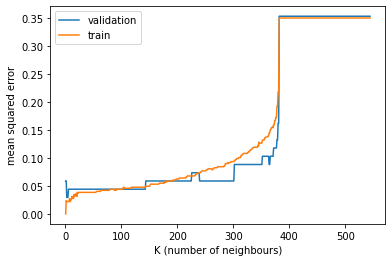

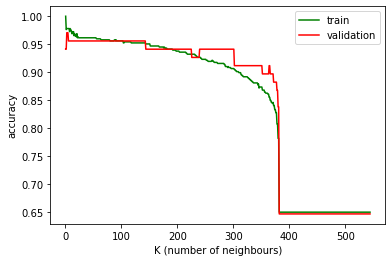

Manhattan
Best training accuracy is 100.0.
Best validation accuracy is 97.1.
The corresponding best K is: 1


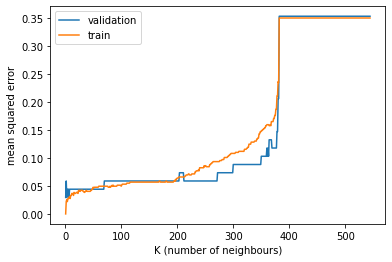

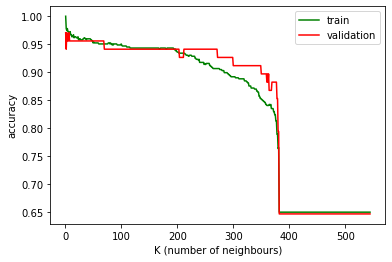

----------KNN models on HP dataset-----------
Eucleadean
Best training accuracy is 90.6.
Best validation accuracy is 87.5.
The corresponding best K is: 4


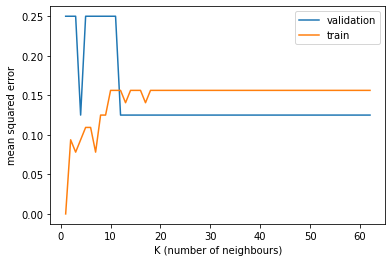

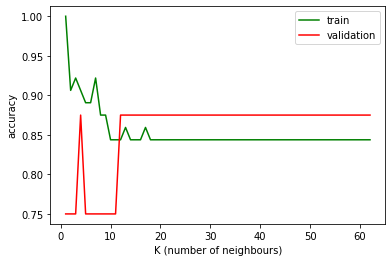

Manhattan
Best training accuracy is 90.6.
Best validation accuracy is 87.5.
The corresponding best K is: 4


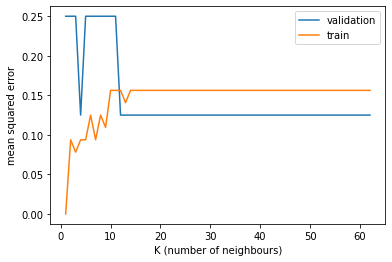

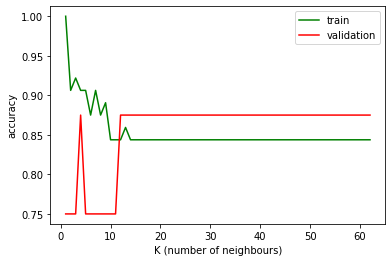

In [30]:
# Compare different distance functions
# WBC
print("----------KNN models on WBC dataset-----------")
print("Eucleadean")
_,_, eucleaModelWBC = tryKs(x_train_wbc, y_train_wbc, x_val_wbc, y_val_wbc, print=True)
print("Manhattan")
a,b, manhaModelWBC = tryKs(x_train_wbc, y_train_wbc, x_val_wbc, y_val_wbc, print=True, dist_fn=manhattan)

# HP
print("----------KNN models on HP dataset-----------")
print("Eucleadean")
a,b, eucleaModelHP = tryKs(x_train_hp, y_train_hp, x_val_hp, y_val_hp, print=True)
print("Manhattan")
a,b, manhaModelHP = tryKs(x_train_hp, y_train_hp, x_val_hp, y_val_hp, print=True, dist_fn=manhattan)


Predict using the model with the best K

----------Predictions of KNN model variants on WBC dataset-----------
Eucleadean
The training accuracy is 97.8.
Test test accuracy is 98.6.
The chosen best k is: 3


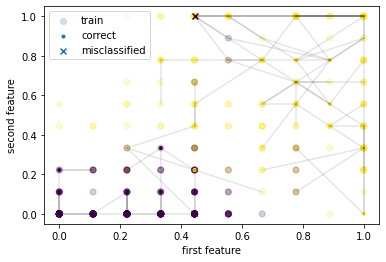

Manhattan
The training accuracy is 100.0.
Test test accuracy is 98.6.
The chosen best k is: 1


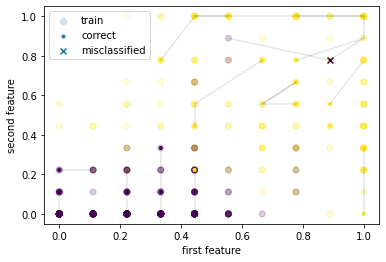

----------Predictions of KNN model variants on HP dataset-----------
Eucleadean
The training accuracy is 90.6.
Test test accuracy is 87.5.
The chosen best k is: 4


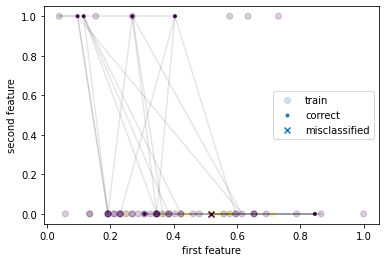

Manhattan
The training accuracy is 90.6.
Test test accuracy is 87.5.
The chosen best k is: 4


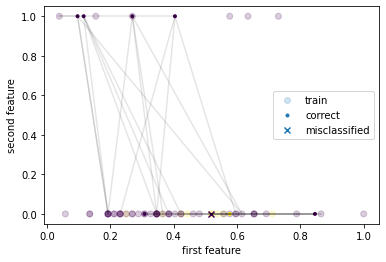

In [31]:
# Predictions
print("----------Predictions of KNN model variants on WBC dataset-----------")
print("Eucleadean")
pred1 = predOnTest(eucleaModelWBC, x_train_wbc, y_train_wbc, x_test_wbc, y_test_wbc)
print("Manhattan")
pred2 = predOnTest(manhaModelWBC, x_train_wbc, y_train_wbc, x_test_wbc, y_test_wbc)

print("----------Predictions of KNN model variants on HP dataset-----------")
print("Eucleadean")
pred3 = predOnTest(eucleaModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Manhattan")
pred4 = predOnTest(manhaModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)

-----Eucleadean------


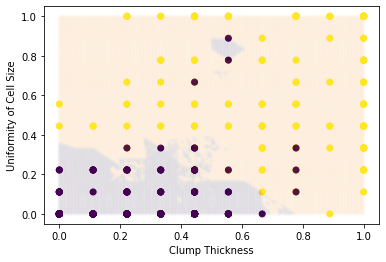

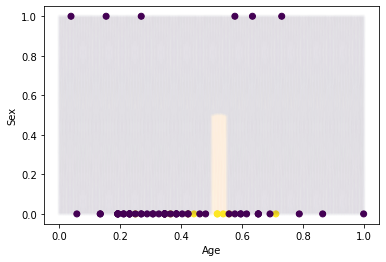

-----Manhattan------


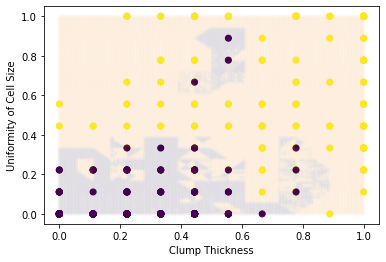

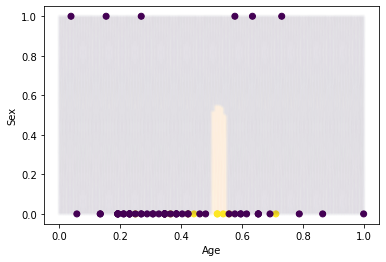

In [32]:
# Plot Decision boundaries 
f = "Clump Thickness"	
s = "Uniformity of Cell Size"
f2 = "Age"
s2 = "Sex"
print("-----Euclidean------")
plotDecisionBoundaries(eucleaModelWBC, x_train_wbc, y_train_wbc, f,s)
plotDecisionBoundaries(eucleaModelHP, x_train_hp, y_train_hp, f2,s2)
print("-----Manhattan------")
plotDecisionBoundaries(manhaModelWBC, x_train_wbc, y_train_wbc, f,s)
plotDecisionBoundaries(manhaModelHP, x_train_hp, y_train_hp, f2,s2)

#### 3.3 Decision Tree 

Fit data to Decision Tree Model and find the best hyperparameter max-depth

----------Decision Trees WBC dataset-----------
Cost function: Misclassification cost
Best training accuracy is 98.0.
Best validation accuracy is 97.1.
The corresponding best max-depth is: 5




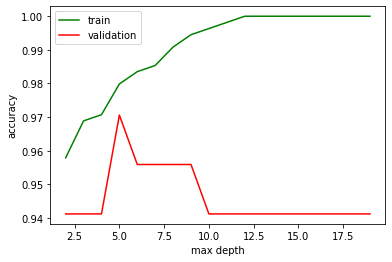

Cost function: Entropy cost
Best training accuracy is 97.1.
Best validation accuracy is 94.1.
The corresponding best max-depth is: 3




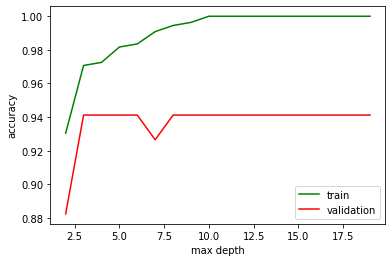

Cost function: Gini Index cost
Best training accuracy is 99.1.
Best validation accuracy is 94.1.
The corresponding best max-depth is: 7




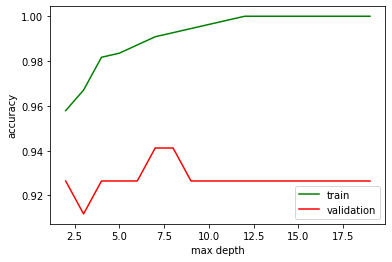

----------Decision Trees on HP dataset-----------
Cost function: Misclassification cost
Best training accuracy is 96.9.
Best validation accuracy is 87.5.
The corresponding best max-depth is: 3




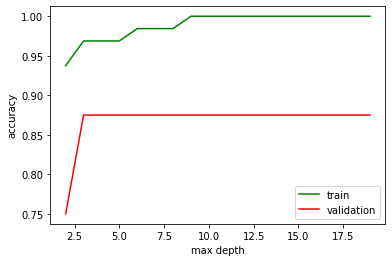

Cost function: Entropy cost
Best training accuracy is 93.8.
Best validation accuracy is 87.5.
The corresponding best max-depth is: 2




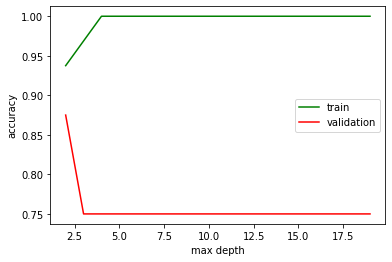

Cost function: Gini Index cost
Best training accuracy is 93.8.
Best validation accuracy is 87.5.
The corresponding best max-depth is: 2




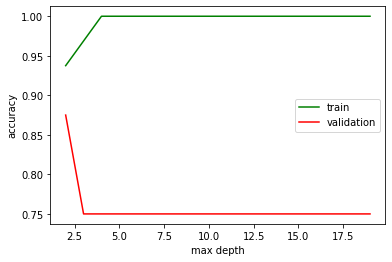

In [33]:
# Hyperparam selection
# WBC
print("----------Decision Trees WBC dataset-----------")
print("Cost function: Misclassification cost")
_,_, misclassifi_modelWBC,_ = tryDepths(x_train_wbc, y_train_wbc, x_val_wbc, y_val_wbc)
print("Cost function: Entropy cost")
_,_, entropy_modelWBC,_ = tryDepths(x_train_wbc, y_train_wbc, x_val_wbc, y_val_wbc, cost_fn=cost_entropy)
print("Cost function: Gini Index cost")
_,_, gini_modelWBC,_ = tryDepths(x_train_wbc, y_train_wbc, x_val_wbc, y_val_wbc, cost_fn=cost_gini_index)

# HP
print("----------Decision Trees on HP dataset-----------")
print("Cost function: Misclassification cost")
_,_, misclassifi_modelHP,_ = tryDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp)
print("Cost function: Entropy cost")
_,_, entropy_modelHP,_ = tryDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp, cost_fn=cost_entropy)
print("Cost function: Gini Index cost")
_,_, gini_modelHP,_ = tryDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp, cost_fn=cost_gini_index)

---------- Predictions on WBC test set-----------
Cost function: Misclassification cost
The training accuracy is 98.0.
The test accuracy is 98.6.
The corresponding best max-depth is: 5


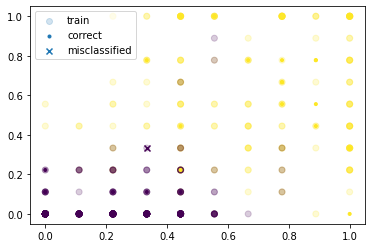

Cost function: Entropy cost
The training accuracy is 97.1.
The test accuracy is 97.1.
The corresponding best max-depth is: 3


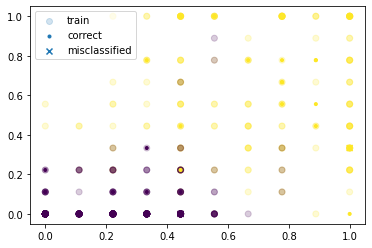

Cost function: Gini Index cost
The training accuracy is 99.1.
The test accuracy is 94.2.
The corresponding best max-depth is: 7


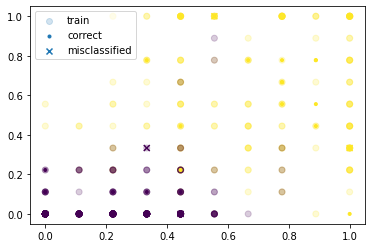

----------Predictions on HP test set-----------
Cost function: Misclassification cost
The training accuracy is 96.9.
The test accuracy is 75.0.
The corresponding best max-depth is: 3


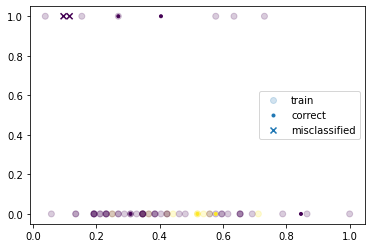

Cost function: Entropy cost
The training accuracy is 93.8.
The test accuracy is 100.0.
The corresponding best max-depth is: 2


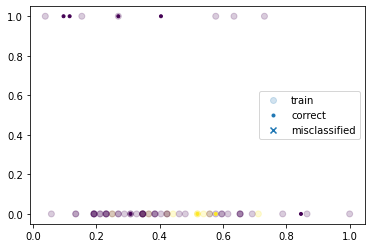

Cost function: Gini Index cost
The training accuracy is 93.8.
The test accuracy is 100.0.
The corresponding best max-depth is: 2


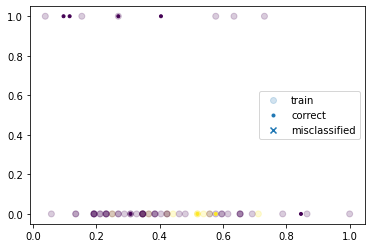

In [34]:
# Predictions
# WBC
print("---------- Predictions on WBC test set-----------")
print("Cost function: Misclassification cost")
predTreeOnTest(misclassifi_modelWBC, x_train_wbc, y_train_wbc, x_test_wbc, y_test_wbc)
print("Cost function: Entropy cost")
predTreeOnTest(entropy_modelWBC, x_train_wbc, y_train_wbc, x_test_wbc, y_test_wbc)
print("Cost function: Gini Index cost")
predTreeOnTest(gini_modelWBC, x_train_wbc, y_train_wbc, x_test_wbc, y_test_wbc)

# HP
print("----------Predictions on HP test set-----------")
print("Cost function: Misclassification cost")
predTreeOnTest(misclassifi_modelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Cost function: Entropy cost")
predTreeOnTest(entropy_modelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Cost function: Gini Index cost")
predTreeOnTest(gini_modelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)

----- Misclassification Cost -----


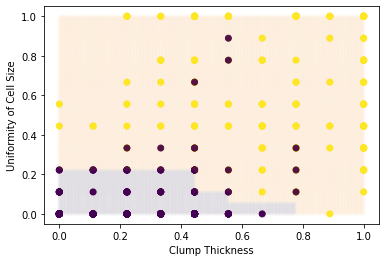

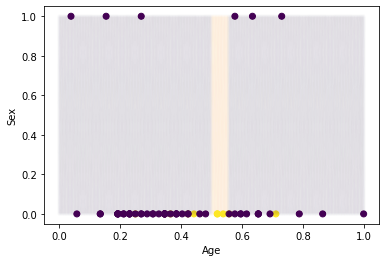

----- Entropy Cost -----


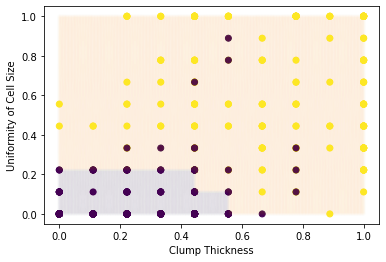

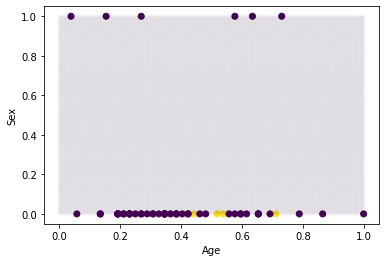

----- Gini Index Cost -----


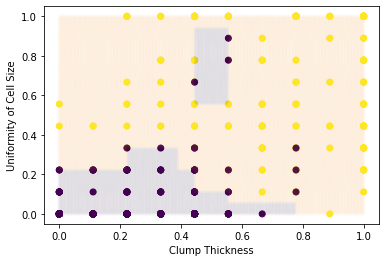

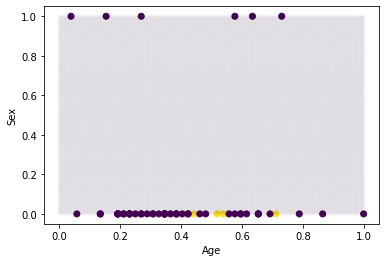

In [35]:
# Plot Decision Boundaries
print("----- Misclassification Cost -----")
plotDecisionBoundaries(misclassifi_modelWBC, x_train_wbc, y_train_wbc, f,s, True)
plotDecisionBoundaries(misclassifi_modelHP, x_train_hp, y_train_hp, f2,s2,True)

print("----- Entropy Cost -----")
plotDecisionBoundaries(entropy_modelWBC, x_train_wbc, y_train_wbc, f,s,True)
plotDecisionBoundaries(entropy_modelHP, x_train_hp, y_train_hp, f2,s2,True)

print("----- Gini Index Cost -----")
plotDecisionBoundaries(gini_modelWBC, x_train_wbc, y_train_wbc, f,s,True)
plotDecisionBoundaries(gini_modelHP, x_train_hp, y_train_hp, f2,s2,True)

### 3.4 Creative Experiment
> Following the research we have done, we found certain features that certain features yielded best results on the Hepatitis dataset, which originally has a significant amount of features.

> For this experiment, we will only select:
Ascite, Albumin, Histology, Bilirubin, Spiders, Steroid.
(more on this in our paper)

In [36]:
# Select features 
colnames = ["Class", "Ascites", "Albumin", "Histology", "Bilirubin", "Spiders", "Steroid"]
reduced_data = df2[colnames]
reduced_data_norm = df2_normalized[colnames]
reduced_data.head()

,Class,Ascites,Albumin,Histology,Bilirubin,Spiders,Steroid
5,0,2,4.0,1,0.9,2,2
10,0,2,4.4,1,1.3,2,1
11,0,2,3.7,1,1.0,1,2
12,0,2,3.9,1,0.9,2,2
13,0,2,4.9,1,2.2,2,2


----------KNN models on HP dataset-----------
Best training accuracy is 100.0.
Best validation accuracy is 100.0.
The corresponding best K is: 1


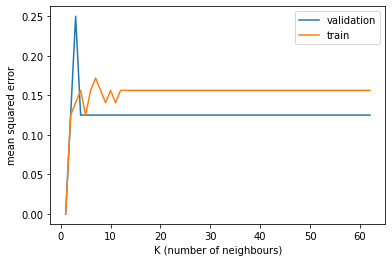

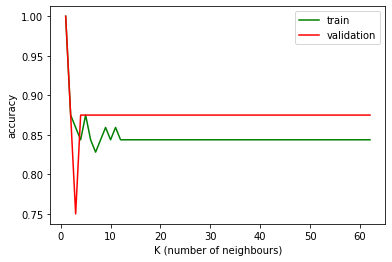

Best training accuracy is 85.9.
Best validation accuracy is 87.5.
The corresponding best K is: 4


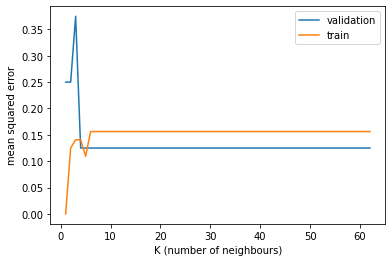

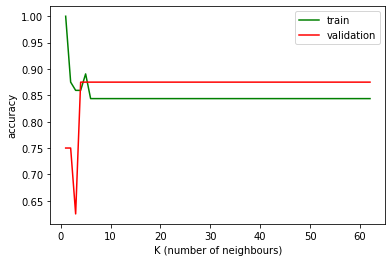

----------Decision Trees on HP dataset-----------
Best training accuracy is 92.2.
Best validation accuracy is 62.5.
The corresponding best max-depth is: 2




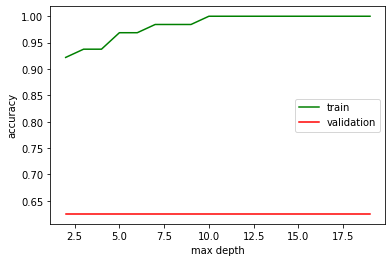

Best training accuracy is 85.9.
Best validation accuracy is 87.5.
The corresponding best max-depth is: 2




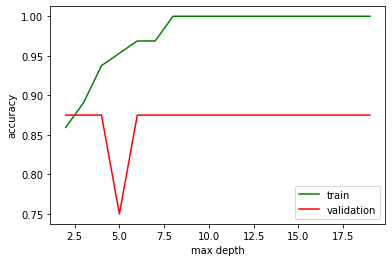

Best training accuracy is 92.2.
Best validation accuracy is 62.5.
The corresponding best max-depth is: 2




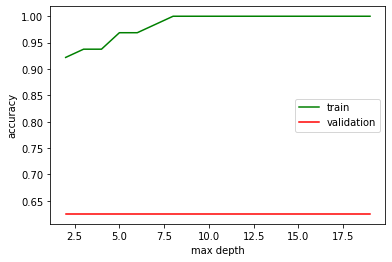

In [37]:
# KNN
x_train_hp, y_train_hp, x_val_hp, y_val_hp, x_test_hp, y_test_hp = splitSets(reduced_data)
print("----------KNN models on HP dataset-----------")
a,b, eucleaModelHP = tryKs(x_train_hp, y_train_hp, x_val_hp, y_val_hp, print=True)
a,b, manhaModelHP = tryKs(x_train_hp, y_train_hp, x_val_hp, y_val_hp, print=True, dist_fn=manhattan)
# Decision Tree
x_train_hp, y_train_hp, x_val_hp, y_val_hp, x_test_hp, y_test_hp = splitSets(reduced_data_norm)
print("----------Decision Trees on HP dataset-----------")
_,_, misclassifi_modelHP,_ = tryDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp)
_,_, entropy_modelHP,_ = tryDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp, cost_fn=cost_entropy)
_,_, gini_modelHP,_ = tryDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp, cost_fn=cost_gini_index)

----------Predictions of KNN model variants on HP dataset-----------
The training accuracy is 100.0.
Test test accuracy is 100.0.
The chosen best k is: 1


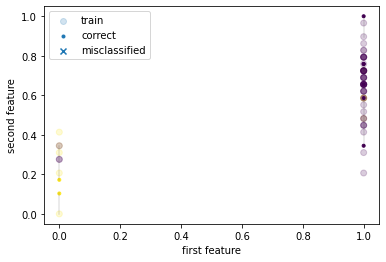

The training accuracy is 89.1.
Test test accuracy is 87.5.
The chosen best k is: 4


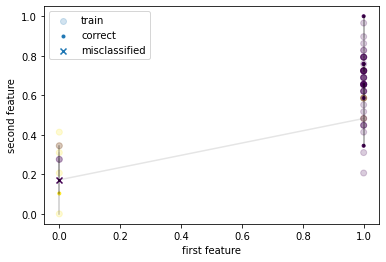

----------Predictions on HP test set-----------
The training accuracy is 92.2.
The test accuracy is 75.0.
The corresponding best max-depth is: 2


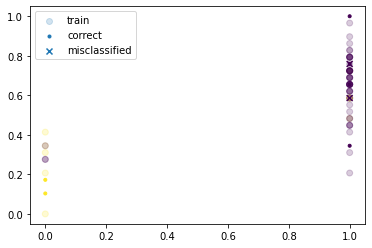

The training accuracy is 85.9.
The test accuracy is 100.0.
The corresponding best max-depth is: 2


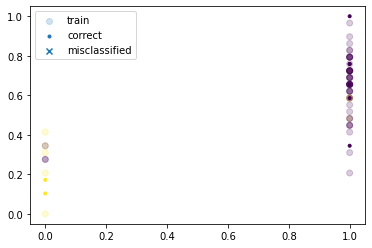

The training accuracy is 92.2.
The test accuracy is 75.0.
The corresponding best max-depth is: 2


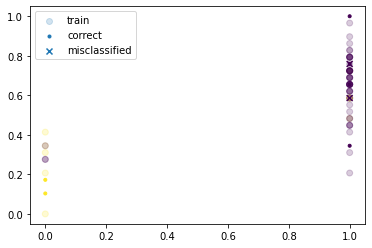

In [38]:
# Predictions
print("----------Predictions of KNN model variants on HP dataset-----------")
predOnTest(eucleaModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
predOnTest(manhaModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("----------Predictions on HP test set-----------")
predTreeOnTest(misclassifi_modelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
predTreeOnTest(entropy_modelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
predTreeOnTest(gini_modelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)